In [1]:
import pickle
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt

import evaluator

In [2]:
probe_type = ""
model_name = 'cultured'
model_folder = (Path(".") / f"{model_name}_model").absolute()

In [3]:
eva = evaluator.create_evaluator(
    model_name=model_name,
    feature_set="soma",
    sample_id=None,
    feature_file="./cultured_model/features.json"
)

eva.fitness_protocols

{'firepattern_120': <bluepyopt.ephys.protocols.SweepProtocol at 0x7ff814643cd0>,
 'IV_-100': <bluepyopt.ephys.protocols.SweepProtocol at 0x7ff814643d90>,
 'APWaveform_260': <bluepyopt.ephys.protocols.SweepProtocol at 0x7ff814643ee0>}

In [4]:
runs = []

for path in glob.glob("./optimization_results/checkpoints/*.tmp"):
    
    print(path)
    
    run = pickle.load(open(path, "rb"))

    run['best_params'] = eva.param_dict(run['halloffame'][0])
    run['responses'] = eva.run_protocols(
        protocols=eva.fitness_protocols.values(),
        param_values=run['best_params']
    )

    runs.append(run)

./optimization_results/checkpoints/model=cultured_sampleid=0_featureset=soma_seed=1.tmp
./optimization_results/checkpoints/model=cultured_sampleid=0_featureset=soma_seed=5.tmp
./optimization_results/checkpoints/model=cultured_sampleid=0_featureset=soma_seed=3.tmp
./optimization_results/checkpoints/model=cultured_sampleid=0_featureset=soma_seed=2.tmp
./optimization_results/checkpoints/model=cultured_sampleid=0_featureset=soma_seed=4.tmp


In [5]:
def plot_responses(responses):
    fig, axes = plt.subplots(len(responses), figsize=(8, 5), squeeze=False)
    for index, (resp_name, response) in enumerate(sorted(responses.items())):
        axes[index, 0].plot(response['time'], response['voltage'], label=resp_name)
        axes[index, 0].set_title(resp_name)
    fig.tight_layout()
    plt.show()


Scores: 
{'APWaveform_260.soma.AHP_depth': 250.0,
 'APWaveform_260.soma.AHP_time_from_peak': 5.981081851724267,
 'APWaveform_260.soma.AP1_amp': 7.418924319847542,
 'APWaveform_260.soma.AP2_amp': 250.0,
 'APWaveform_260.soma.AP_amplitude': 24.350684779262163,
 'APWaveform_260.soma.AP_begin_voltage': 3.204945011666872,
 'APWaveform_260.soma.AP_begin_width': 0.5786370244156944,
 'APWaveform_260.soma.AP_duration_half_width': 4.242640687118833,
 'IV_-100.soma.Spikecount': 100.0,
 'IV_-100.soma.decay_time_constant_after_stim': 33.459434272516944,
 'IV_-100.soma.ohmic_input_resistance_vb_ssse': 250.0,
 'IV_-100.soma.sag_amplitude': 250.0,
 'IV_-100.soma.sag_ratio1': 250.0,
 'IV_-100.soma.sag_ratio2': 250.0,
 'IV_-100.soma.steady_state_voltage_stimend': 14.109004430871337,
 'IV_-100.soma.voltage_base': 250.0,
 'IV_-100.soma.voltage_deflection': 250.0,
 'IV_-100.soma.voltage_deflection_begin': 250.0,
 'firepattern_120.soma.AHP_depth': 250.0,
 'firepattern_120.soma.AHP_time_from_peak': 34.74219

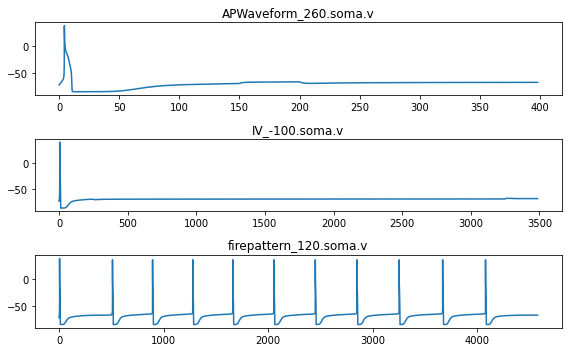


Scores: 
{'APWaveform_260.soma.AHP_depth': 250.0,
 'APWaveform_260.soma.AHP_time_from_peak': 3.2377589757336023,
 'APWaveform_260.soma.AP1_amp': 8.030674074493461,
 'APWaveform_260.soma.AP2_amp': 250.0,
 'APWaveform_260.soma.AP_amplitude': 26.180470466969417,
 'APWaveform_260.soma.AP_begin_voltage': 3.724597493782681,
 'APWaveform_260.soma.AP_begin_width': 5.491147272513922,
 'APWaveform_260.soma.AP_duration_half_width': 1.4142135623722911,
 'IV_-100.soma.Spikecount': 100.0,
 'IV_-100.soma.decay_time_constant_after_stim': 33.459434272516944,
 'IV_-100.soma.ohmic_input_resistance_vb_ssse': 250.0,
 'IV_-100.soma.sag_amplitude': 250.0,
 'IV_-100.soma.sag_ratio1': 250.0,
 'IV_-100.soma.sag_ratio2': 250.0,
 'IV_-100.soma.steady_state_voltage_stimend': 8.810032281090422,
 'IV_-100.soma.voltage_base': 250.0,
 'IV_-100.soma.voltage_deflection': 250.0,
 'IV_-100.soma.voltage_deflection_begin': 250.0,
 'firepattern_120.soma.AHP_depth': 250.0,
 'firepattern_120.soma.AHP_time_from_peak': 67.36067

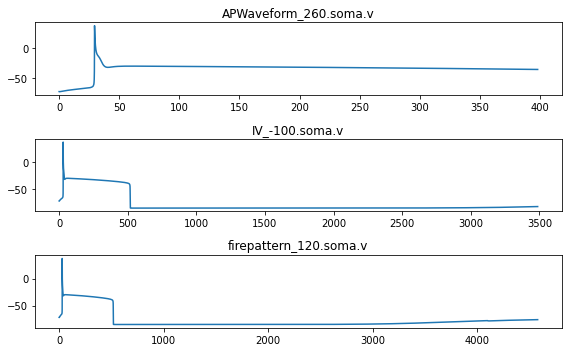


Scores: 
{'APWaveform_260.soma.AHP_depth': 250.0,
 'APWaveform_260.soma.AHP_time_from_peak': 3.7481446270804115,
 'APWaveform_260.soma.AP1_amp': 4.932146241179364,
 'APWaveform_260.soma.AP2_amp': 14.213702050061418,
 'APWaveform_260.soma.AP_amplitude': 15.094087015438511,
 'APWaveform_260.soma.AP_begin_voltage': 2.508881953658237,
 'APWaveform_260.soma.AP_begin_width': 0.696726213071425,
 'APWaveform_260.soma.AP_duration_half_width': 7.0710678118653245,
 'IV_-100.soma.Spikecount': 100.0,
 'IV_-100.soma.decay_time_constant_after_stim': 33.459434272516944,
 'IV_-100.soma.ohmic_input_resistance_vb_ssse': 250.0,
 'IV_-100.soma.sag_amplitude': 250.0,
 'IV_-100.soma.sag_ratio1': 250.0,
 'IV_-100.soma.sag_ratio2': 250.0,
 'IV_-100.soma.steady_state_voltage_stimend': 14.321426628311334,
 'IV_-100.soma.voltage_base': 250.0,
 'IV_-100.soma.voltage_deflection': 250.0,
 'IV_-100.soma.voltage_deflection_begin': 250.0,
 'firepattern_120.soma.AHP_depth': 250.0,
 'firepattern_120.soma.AHP_time_from_p

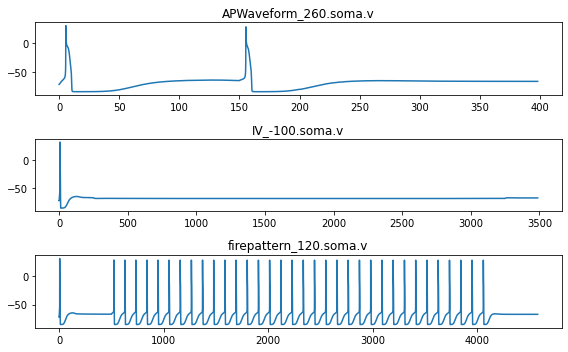


Scores: 
{'APWaveform_260.soma.AHP_depth': 250.0,
 'APWaveform_260.soma.AHP_time_from_peak': 0.5263352029517204,
 'APWaveform_260.soma.AP1_amp': 4.7029438720978485,
 'APWaveform_260.soma.AP2_amp': 5.142340623154362,
 'APWaveform_260.soma.AP_amplitude': 7.293724040070785,
 'APWaveform_260.soma.AP_begin_voltage': 1.9265316897574658,
 'APWaveform_260.soma.AP_begin_width': 4.113440071524109,
 'APWaveform_260.soma.AP_duration_half_width': 8.013876853447343,
 'IV_-100.soma.Spikecount': 200.0,
 'IV_-100.soma.decay_time_constant_after_stim': 33.459434272516944,
 'IV_-100.soma.ohmic_input_resistance_vb_ssse': 250.0,
 'IV_-100.soma.sag_amplitude': 250.0,
 'IV_-100.soma.sag_ratio1': 250.0,
 'IV_-100.soma.sag_ratio2': 250.0,
 'IV_-100.soma.steady_state_voltage_stimend': 21.80549865638061,
 'IV_-100.soma.voltage_base': 250.0,
 'IV_-100.soma.voltage_deflection': 250.0,
 'IV_-100.soma.voltage_deflection_begin': 250.0,
 'firepattern_120.soma.AHP_depth': 250.0,
 'firepattern_120.soma.AHP_time_from_pea

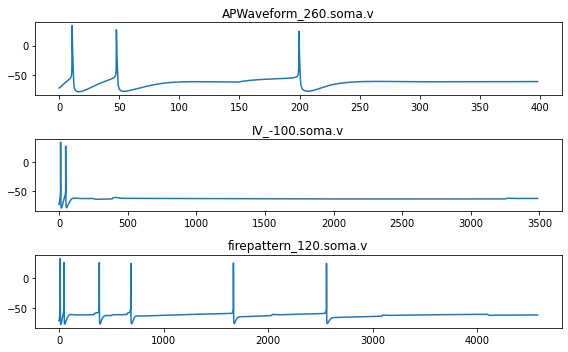


Scores: 
{'APWaveform_260.soma.AHP_depth': 250.0,
 'APWaveform_260.soma.AHP_time_from_peak': 3.1021877870945214,
 'APWaveform_260.soma.AP1_amp': 5.758709081136046,
 'APWaveform_260.soma.AP2_amp': 16.303728810980704,
 'APWaveform_260.soma.AP_amplitude': 19.30233624445282,
 'APWaveform_260.soma.AP_begin_voltage': 1.081937960170763,
 'APWaveform_260.soma.AP_begin_width': 1.1395606705326955,
 'APWaveform_260.soma.AP_duration_half_width': 4.006938426723053,
 'IV_-100.soma.Spikecount': 200.0,
 'IV_-100.soma.decay_time_constant_after_stim': 33.459434272516944,
 'IV_-100.soma.ohmic_input_resistance_vb_ssse': 250.0,
 'IV_-100.soma.sag_amplitude': 250.0,
 'IV_-100.soma.sag_ratio1': 250.0,
 'IV_-100.soma.sag_ratio2': 250.0,
 'IV_-100.soma.steady_state_voltage_stimend': 15.62231862116227,
 'IV_-100.soma.voltage_base': 250.0,
 'IV_-100.soma.voltage_deflection': 250.0,
 'IV_-100.soma.voltage_deflection_begin': 250.0,
 'firepattern_120.soma.AHP_depth': 250.0,
 'firepattern_120.soma.AHP_time_from_pea

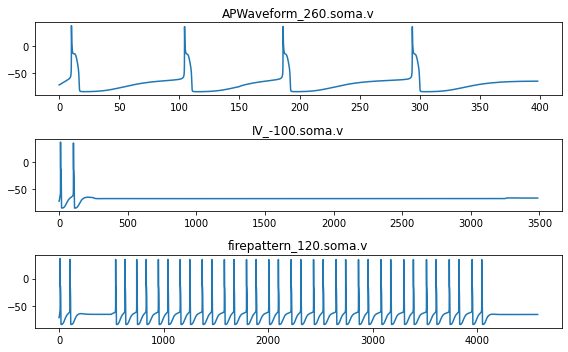

In [6]:
import pprint

for run in runs:

    feature_names = [obj.name for obj in eva.fitness_calculator.objectives]
    scores = dict(zip(feature_names, run['halloffame'][0].fitness.values))

    print("\nScores: ")
    pprint.pprint(scores)

    print("Parameters:")
    pprint.pprint(run['best_params'])

    plot_responses(run['responses'])